# **Кейс №2: Бои без правил**

## **0 Импорт библиотек**

In [ ]:
from itertools import product

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/zalig/cu-datasets/main/without_rules.csv"
)
df.set_index("Id", inplace=True)
df["Subscription"] = pd.Categorical(df["Subscription"])
df["Gender"] = pd.Categorical(df["Gender"])
df["Age"] = pd.Categorical(df["Age"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, id1 to id1000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             1000 non-null   category
 1   Gender          1000 non-null   category
 2   Subscription    1000 non-null   category
 3   Videos Watched  1000 non-null   int64   
dtypes: category(3), int64(1)
memory usage: 18.9+ KB


## **1.1 A - друг, B - враг**

In [ ]:
def stratified_sample(df, is_enemy: bool, metric_col='Videos Watched'):
    sorted_df = df.sort_values(metric_col, ascending=False)
    samples = []
    for gender, age_group in product(df['Gender'].unique(), df['Age'].unique()):
        original_count = len(
            df[(df['Gender'] == gender) & (df['Age'] == age_group)])
        proportion = original_count / len(df)

        group_people = sorted_df[
            (sorted_df['Gender'] == gender) & (sorted_df['Age'] == age_group)]
        if not is_enemy:
            samples.append(
                group_people.nlargest(int(proportion * 200), columns=[metric_col]))
        else:
            samples.append(
                group_people.nsmallest(int(proportion * 200), columns=[metric_col])
            )
    return pd.concat(samples)

,Age,Gender,Subscription,Videos Watched,Selection winner A
Id,,,,,
id1,25+,Male,B,7,1
id2,25+,Female,B,20,0
id3,<25,Female,A,178,0
id4,25+,Female,A,31,0
id5,25+,Female,A,36,0
...,...,...,...,...,...
id996,<25,Female,B,243,1
id997,<25,Male,A,159,0
id998,<25,Female,A,197,0


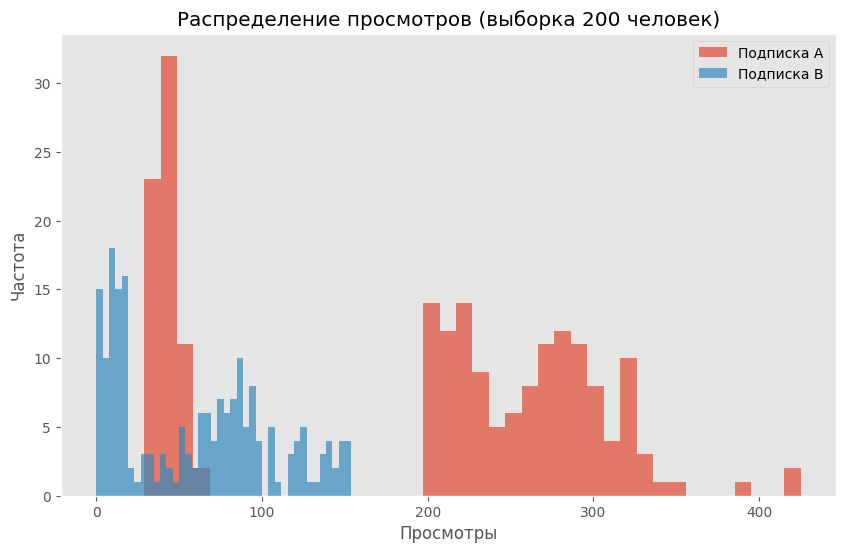

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

selected_A = stratified_sample(df, False)

selected_B = stratified_sample(df, True)

selected_A["Videos Watched"].plot(
    kind="hist", bins=40, grid=False, ax=ax, alpha=0.7,
    title="Распределение просмотров (выборка 200 человек)",
    label="Подписка A"
)

selected_B["Videos Watched"].plot(
    kind="hist", bins=40, grid=False, ax=ax, alpha=0.7,
    label="Подписка B",
    ylabel="Частота",
    xlabel="Просмотры"
)
ax.legend()

df["Selection winner A"] = df.index.isin(
    selected_A.index.union(selected_B.index)).astype(int)
df

Из приведенного графика видно, что в случайной выборке гораздо больше просмотров набирает подписка A, и кроме того, делает это в разы чаще подписки B, значит, **подписка A выгоднее**.

## **1.2 A - враг, B - друг**

,Age,Gender,Subscription,Videos Watched,Selection winner A,Selection winner B
Id,,,,,,
id1,25+,Male,B,7,1,1
id2,25+,Female,B,20,0,0
id3,<25,Female,A,178,0,0
id4,25+,Female,A,31,0,0
id5,25+,Female,A,36,0,0
...,...,...,...,...,...,...
id996,<25,Female,B,243,1,1
id997,<25,Male,A,159,0,0
id998,<25,Female,A,197,0,0


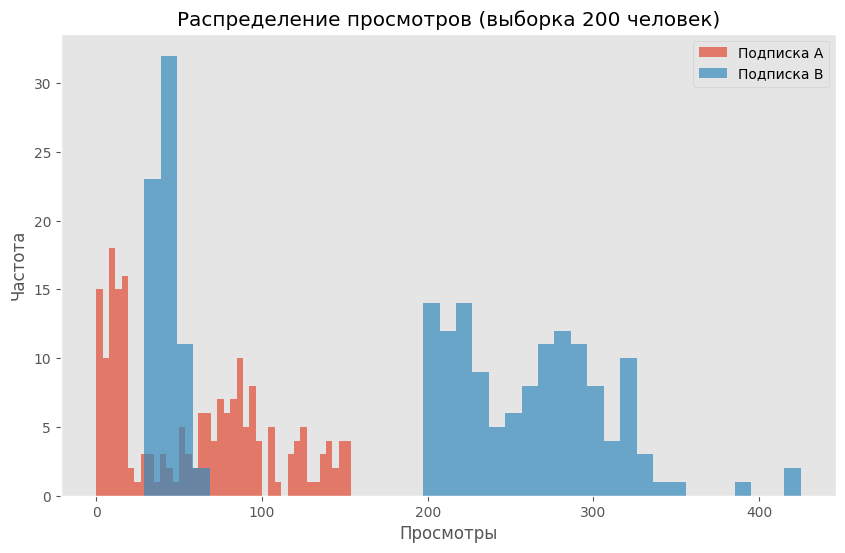

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

selected_A = stratified_sample(df, True)
selected_B = stratified_sample(df, False)

selected_A["Videos Watched"].plot(
    kind="hist", bins=40, grid=False, ax=ax, alpha=0.7,
    title="Распределение просмотров (выборка 200 человек)",
    label="Подписка A",
)

selected_B["Videos Watched"].plot(
    kind="hist", bins=40, grid=False, ax=ax, alpha=0.7,
    label="Подписка B",
    ylabel="Частота",
    xlabel="Просмотры",
)
ax.legend()

df["Selection winner B"] = df.index.isin(
    selected_A.index.union(selected_B.index)).astype(int)
df

Из приведенного графика видно, что в случайной выборке гораздо больше просмотров набирает подписка B, и кроме того, делает это в разы чаще подписки A, значит, **подписка B выгоднее**.

## **2 A - друг, победа во всех категориях**

Text(0.5, 0.98, 'Сравнение по каждой половозрастной группе')

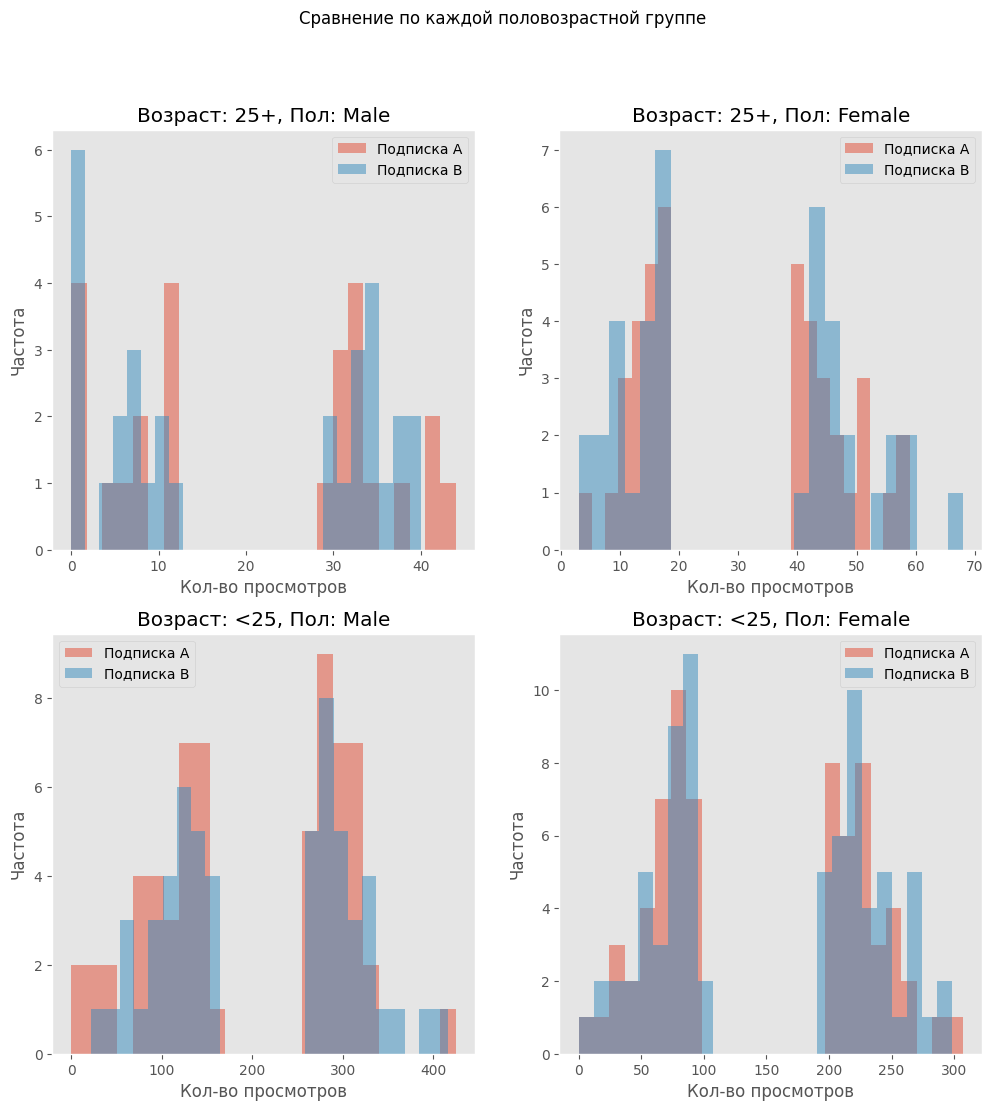

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, (age, gender) in enumerate(product(df["Age"].unique(), df["Gender"].unique())):
    ax = axes[i // 2, i % 2]
    df.loc[
        (df["Selection winner A"] == 1) & (df["Gender"] == gender) & (df["Age"] == age) &
        (df["Subscription"] == "A"), "Videos Watched"
    ].plot(kind="hist", bins=25, grid=False, ax=ax, alpha=0.5)
    df.loc[
        (df["Selection winner A"] == 1) & (df["Gender"] == gender) & (df["Age"] == age) &
        (df["Subscription"] == "B"), "Videos Watched"
    ].plot(kind="hist", bins=25, grid=False, ax=ax, alpha=0.5)
    ax.legend(['Подписка A', 'Подписка B'])
    ax.set_title(f'Возраст: {age}, Пол: {gender}')
    ax.set_ylabel("Частота")
    ax.set_xlabel("Кол-во просмотров")
fig.suptitle("Сравнение по каждой половозрастной группе")

Как можно заметить, в каждой половозрастной категории преимущество за подпиской А, бОльшие значения кол-ва просмотров у нее встречаются гораздо чаще, чем у подписки B, поэтому лидером по праву можно считать подписку A.

Text(0.5, 0.98, 'Сравнение по каждой половозрастной группе')

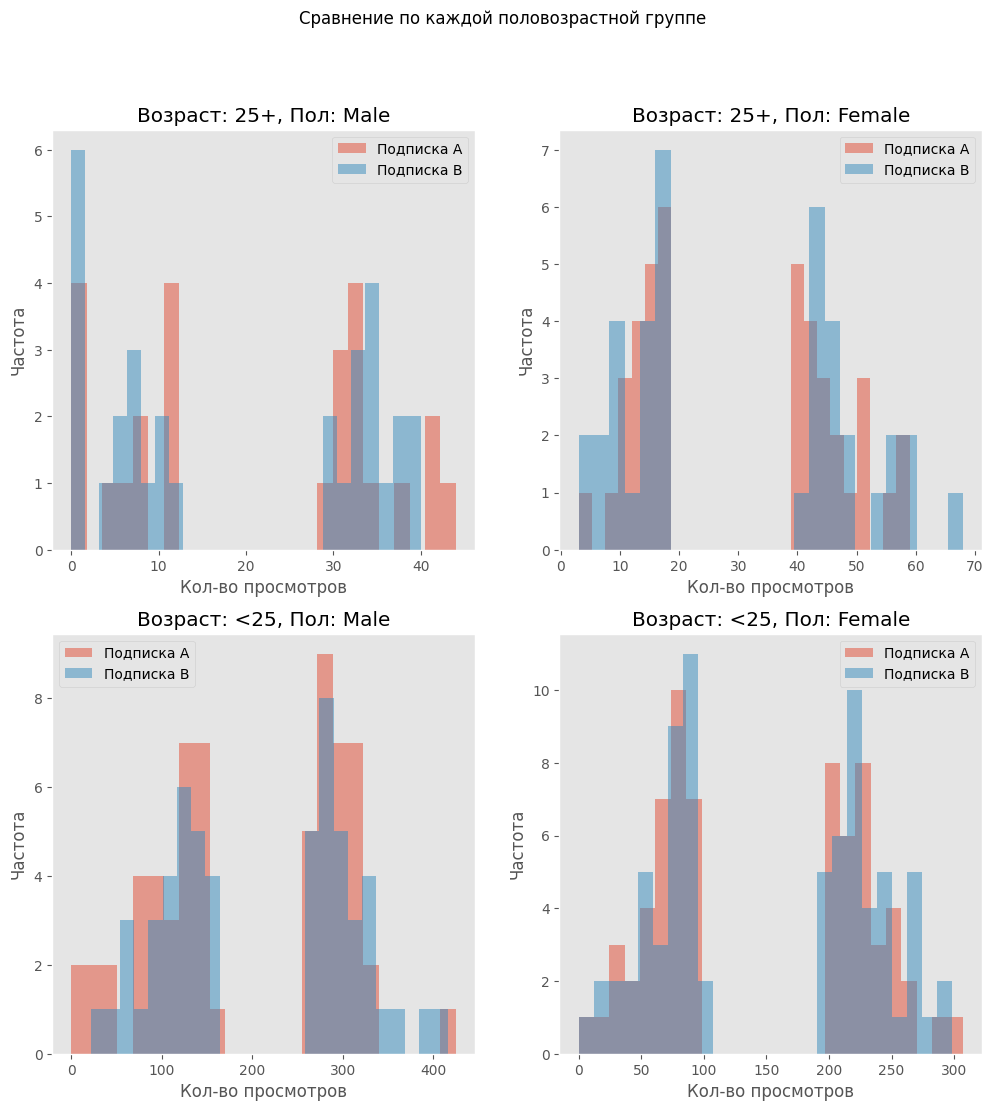

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, (age, gender) in enumerate(product(df["Age"].unique(), df["Gender"].unique())):
    ax = axes[i // 2, i % 2]
    df.loc[
        (df["Selection winner B"] == 1) & (df["Gender"] == gender) & (df["Age"] == age) &
        (df["Subscription"] == "A"), "Videos Watched"
    ].plot(kind="hist", bins=25, grid=False, ax=ax, alpha=0.5)
    df.loc[
        (df["Selection winner B"] == 1) & (df["Gender"] == gender) & (df["Age"] == age) &
        (df["Subscription"] == "B"), "Videos Watched"
    ].plot(kind="hist", bins=25, grid=False, ax=ax, alpha=0.5)

    ax.legend(['Подписка A', 'Подписка B'])
    ax.set_title(f'Возраст: {age}, Пол: {gender}')
    ax.set_ylabel("Частота")
    ax.set_xlabel("Кол-во просмотров")
fig.suptitle("Сравнение по каждой половозрастной группе")

Как можно заметить, в каждой половозрастной категории преимущество за подпиской B, бОльшие значения кол-ва просмотров у нее встречаются гораздо чаще, чем у подписки A, поэтому лидером по праву можно считать подписку B.

## **3 Сохранение распределения**

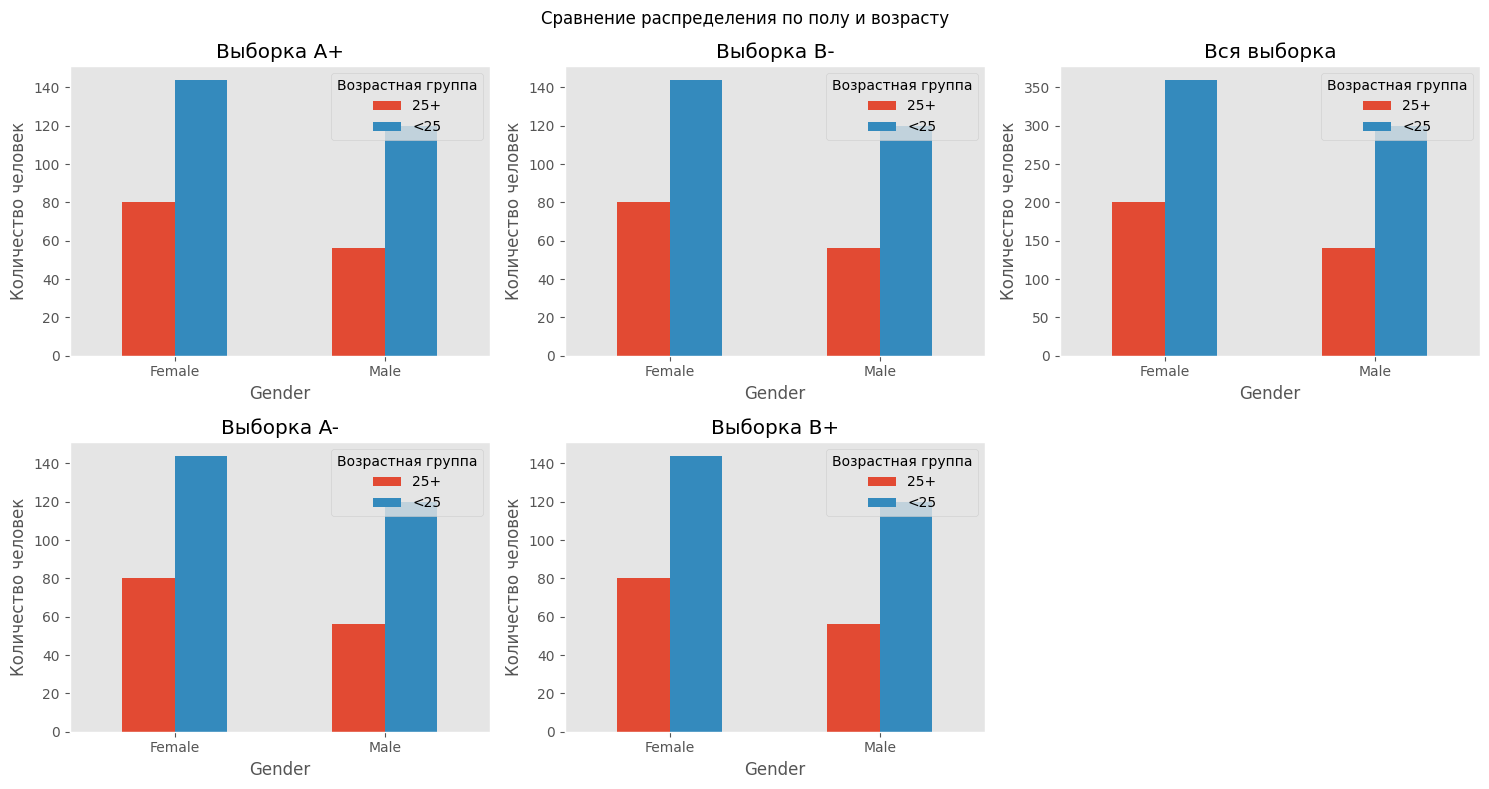

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes[1, 2].remove()

plot_configs = [
    (0, 0, 'Selection winner A', 1, 'Выборка A+'),
    (0, 1, 'Selection winner B', 1, 'Выборка B-'),
    (0, 2, None, None, 'Вся выборка'),
    (1, 0, 'Selection winner A', 1, 'Выборка A-'),
    (1, 1, 'Selection winner B', 1, 'Выборка B+')
]

for i, (row, col, selection_col, selection_value, title) in enumerate(plot_configs):
    ax = axes[row, col]

    if selection_col is None:
        plot_data = df
    else:
        plot_data = df[df[selection_col] == selection_value]

    cross_tab = pd.crosstab(plot_data['Gender'], plot_data['Age'])
    cross_tab.plot(kind='bar', ax=ax, title=title, grid=False)

    ax.set_ylabel('Количество человек')
    ax.legend(title='Возрастная группа')

    ax.tick_params(axis='x', rotation=0)

plt.suptitle('Сравнение распределения по полу и возрасту')
plt.tight_layout()
plt.show()